# Multilayer Network Visualization Tutorial

### This tutorial accompanies the paper "Social Network Analysis for Social Neuroscientists" by Elisa C. Baek, Mason A. Porter, and Carolyn Parkinson.

## 1 Introduction

In this tutorial, we demonstrate how we can use a Python package to visualize multilayer networks. We use the ```pymnet``` library (http://www.mkivela.com/pymnet/index.html) for Python that was created by Mikko Kivelä. The library can be downloaded via the repository on the ```pymnet``` website.

First, we need to add the library directory to our path.

In [2]:
import sys

sys.path.append("/your/path/to/bolozna-multilayer-networks-library-fdd96eef61dd/")

We then import the library.

In [6]:
from pymnet import *

We are now ready to create and visualize multilayer networks.

## 2 Example: A Multiplex Network

Let's consider 10 people, and suppose that we want to examine different types of relationships that they have with each another. Let's say that we want to understand who is friends with whom, who works with whom, and who is teammates with whom in a sports league. We can do this by creating a multiplex network with 3 layers, each of which has edges that encode one of these relationships.

We start by creating a multiplex network called "mplex".

In [7]:
mplex = MultiplexNetwork(
    couplings = "none"
    )

We next add 10 nodes that represent each person in the social group.

In [8]:
people = [
    "John", "Max", "Kevin", 
    "Hannah", "Rachel", "Jennifer", 
    "Daniel", "Lydia", "Sarah", "Liz"    
    ]

We then add nodes to our multiplex network; each node corresponds to one person in our list.

In [9]:
for x in people:
    mplex.add_node(x)

In [10]:
list(mplex)

['Jennifer',
 'Daniel',
 'Max',
 'Rachel',
 'Sarah',
 'Hannah',
 'Kevin',
 'Lydia',
 'Liz',
 'John']

We next add each of the 3 layers to encode the different types of relationships in which we are interested.

In [11]:
mplex.add_layer("Friendship")

In [12]:
mplex.add_layer("Professional")

In [13]:
mplex.add_layer("Recreational")

Let's now add intralayer edges. We begin by adding edges in the friendship layer, with each edge representing the existence of a friendship between two individuals.

We add individual edges by using the following line of code. (In this example, we are adding an edge between John and Max in the friendship layer.)

In [14]:
mplex['John','Friendship']['Max','Friendship'] = 1

Because it is cumbersome to have to repeat the above script for every edge that we want to add, we instead create an edge list. Recall that in an edge list, each row consists of two nodes that have an edge between them. We then create a function to add an edge between each pair.

In [15]:
friends = [
    ["John", "Max"],
    ["Hannah", "Max"],
    ["Lydia", "John"],
    ["Sarah", "Rachel"],
    ["Lydia", "Daniel"],
    ["Hannah", "Jennifer"],
    ["Liz", "Max"],
    ["Sarah", "Kevin"],
    ["Kevin", "Max"],
    ["Daniel", "Max"],
    ["Hannah", "Liz"]
    ]

In [16]:
for x in range(len(friends)):
        mplex[friends[x][0],'Friendship'][friends[x][1], 'Friendship'] = 1

We next add edges in the professional layer to represent the existence of a professional relationship.

In [17]:
coworkers = [
    ["John", "Max"],
    ["Jennifer", "John"],
    ["Jennifer", "Max"],
    ["Jennifer", "Liz"],
    ["John", "Liz"],
    ["Max", "Liz"],
    ["Sarah", "Lydia"],
    ["Hannah", "Daniel"],
    ["Daniel", "Kevin"],
    ["Kevin", "Hannah"],
    ["Kevin", "John"]
    ]

In [18]:
for x in range(len(coworkers)):
        mplex[coworkers[x][0], 'Professional'][coworkers[x][1], 'Professional'] = 1

We do the same for the recreational layer.

In [19]:
teammates = [
    ["John", "Max"],
    ["Daniel", "Max"],
    ["Sarah", "Max"],
    ["Sarah", "Daniel"],
    ["Sarah", "John"],
    ["Sarah", "Daniel"],
    ["Sarah", "Lydia"],
    ["Lydia", "Hannah"],
    ["Lydia", "Liz"],
    ["Lydia", "Rachel"],
    ["Hannah", "Liz"],
    ["Hannah", "Rachel"],
    ["Liz", "Rachel"]
    ]

In [20]:
for x in range(len(teammates)):
        mplex[teammates[x][0],'Recreational'][teammates[x][1], 'Recreational'] = 1

Now that we have our multiplex network, we visualize it.

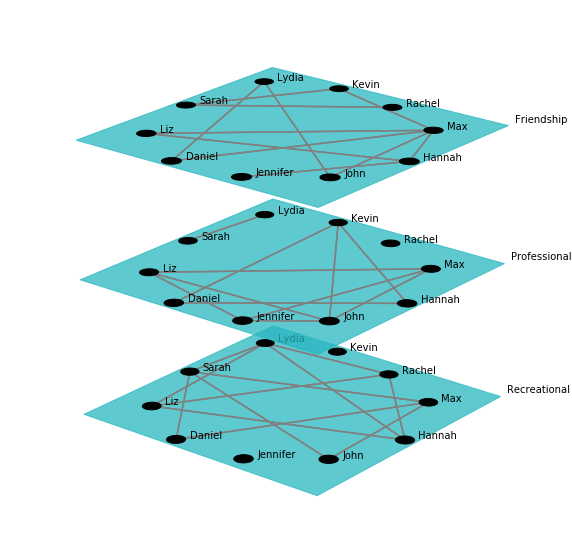

In [21]:
fig = draw(
    mplex, show = True, layout = "spring", 
    figsize = (10,10), defaultLayerLabelLoc = (1,1.04)
    )

## 3 Another Type of Multilayer Network

Suppose that we are interested in visually representing which restaurants are frequented by people and whether friends tend to eat at the same restaurants. We may also be interested in characterizing culinary collaborations between restaurants. In this example, we encode these social networks in different layers of a multilayer network.

We start by creating a multilayer network named "mnet".

In [22]:
mnet = MultilayerNetwork(
    aspects = 1, fullyInterconnected = False
    )

First, we add our two layers.

In [23]:
mnet.add_layer("Friendship")

In [24]:
mnet.add_layer("Restaurants")

We then specify the nodes in each layer. 

In [25]:
people = [
    "John", "Max", "Kevin", "Hannah", 
    "Rachel", "Jennifer", "Daniel", 
    "Lydia", "Sarah", "Liz"
    ]

In [26]:
restaurants = [
    "Zahav", "Fat Salmon", "Vernick", 
    "Dandelion", "Cafe Nhan", "Suraya"
    ]

We then add our nodes to their respective layers. We insert nodes that represent people into the friendship network, and we insert nodes that represent restaurants into the restaurant layer.

In [27]:
for x in people:
    mnet.add_node(x, "Friendship")

In [28]:
for x in restaurants:
    mnet.add_node(x, "Restaurants")

We next insert intralayer edges in the friendship layer.

In [29]:
friends = [
    ["John", "Max"],
    ["Hannah", "Max"],
    ["Lydia", "John"],
    ["Sarah", "Rachel"],
    ["Lydia", "Daniel"],
    ["Hannah", "Jennifer"],
    ["Liz", "Max"],
    ["Sarah", "Kevin"],
    ["Kevin", "Max"],
    ["Daniel","Max"],
    ["Hannah","Liz"]
    ]

In [30]:
for x in range(len(friends)):
        mnet[friends[x][0],'Friendship'][friends[x][1], 'Friendship'] = 1

Similarly, we insert intralayer edges in the restaurant layer. An edge represents the existence of a collaboration between two restaurants.

In [31]:
collaborations = [
    ["Zahav", "Cafe Nhan"],
    ["Fat Salmon", "Cafe Nhan"],
    ["Vernick", "Dandelion"],
    ["Vernick", "Suraya"],
    ["Cafe Nhan", "Suraya"]
    ]

In [32]:
for x in range(len(collaborations)):
        mnet[collaborations[x][0],'Restaurants'][collaborations[x][1], 'Restaurants'] = 1

We next insert interlayer edges between nodes in the friendship and restaurant layers. The existence of an edge between a node in the friendship layer and a node in the restaurant layer indicates that the individual patronizes the restaurant.

In [33]:
patronage = [
    ["John", "Cafe Nhan"],
    ["Hannah", "Vernick"],
    ["Lydia", "Zahav"],
    ["Sarah", "Dandelion"],
    ["Lydia", "Fat Salmon"],
    ["Hannah", "Vernick"],
    ["Liz", "Zahav"],
    ["Sarah", "Fat Salmon"],
    ["Kevin", "Zahav"],
    ["Daniel", "Zahav"],
    ["Hannah", "Fat Salmon"]
    ]

In [34]:
for x in range(len(patronage)):
    mnet[patronage[x][0],"Friendship"][patronage[x][1],"Restaurants"] = 1

We next visualize the network. We first specify "nodeColorDict", which sets the color of the nodes in the restaurant layer to red.

In [35]:
nodeColorDict = {}

In [36]:
for i in restaurants:
    nodeColorDict.update(
        {
            (i, "Restaurants"): "r"
        }
    )

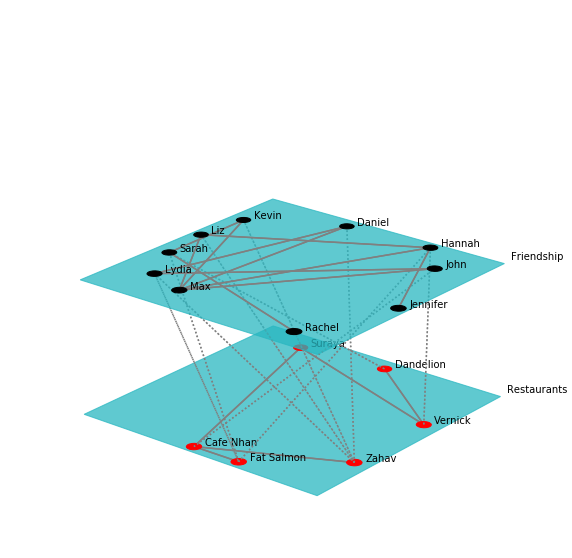

In [37]:
fig = draw(
    mnet, show = True, layout = "spring", 
    figsize = (10, 10), defaultLayerLabelLoc = (1, 1.04),
    nodeColorDict = nodeColorDict
    )

## 4 Conclusion

In the present tutorial, we demonstrated how one can use ```pymnet``` to visualize multilayer networks. A detailed review of multilayer network analysis is beyond the scope of the tutorial and the paper. We encourage researchers who are interested in analyzing multilayer networks to look at the following two review articles.

- Kivelä, M., Arenas, A., Barthelemy, M., Gleeson, J. P., Moreno, Y., & Porter, M. A. (2014). Multilayer networks. *Journal of Complex Networks, 2*(3), 203–271.
- Finn, K. R., Silk, M. J., Porter, M. A., & Pinter-Wollman, N. (2019). The use of multilayer network analysis across social scales in animal behaviour. *Animal Behaviour, 149*, 7–22.